# Baseline — DummyClassifier (classe più frequente) con 10-Fold Cross-Validation

Questo notebook valuta un **baseline** con `DummyClassifier(strategy="stratified")`.
Ricordati che il dummy classifier effettua una predizione utilizzando solo le feature target
ignorando le feature di input.
1. Caricamento dati (training bilanciato + test).
2. Valutazione finale sul test set separato (Accuracy, Precision, Recall, F1, Confusion Matrix).

Il DummyClassifier è stato utilizzato come baseline non ottimizzata. Essendo privo di iperparametri e incapace di apprendere dai dati, è stato semplicemente addestrato sul training set completo e valutato sul test set. Questo approccio, pur non simmetrico rispetto alla validazione incrociata usata per i modelli reali, è sufficiente per definire un riferimento minimo di performance."

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.dummy import DummyClassifier

In [4]:
TRAINING_PATH = "risorse/training_bilanciato.csv"
TEST_PATH = "risorse/test_set.csv"
FEATURES = ["OFF_FISICO", "OFF_SPECIALE", "TANK_FISICO", "TANK_SPECIALE"]
TARGET = "Archetipo"

df_train = pd.read_csv(TRAINING_PATH)
df_test = pd.read_csv(TEST_PATH)

# Controllo colonne richieste
missing = [c for c in FEATURES + [TARGET] if c not in df_train.columns]
if missing:
    raise KeyError(f"Mancano colonne nel dataset: {missing}. Assicurati che il file contenga FEATURES e TARGET richiesti.")

missing_test = [c for c in FEATURES + [TARGET] if c not in df_test.columns]
if missing_test:
    raise KeyError(f"Mancano colonne nel TEST SET: {missing_test}")

# Selezione e pulizia minima
df_train = df_train[FEATURES + [TARGET]].copy()
df_test = df_test[FEATURES + [TARGET]].copy()
# Converto le feature a numerico sicuro
for c in FEATURES:
    df_train[c] = pd.to_numeric(df_train[c], errors="coerce")
    df_test = df_test[FEATURES + [TARGET]].copy()

# Drop righe con NaN nelle feature o nel target
before = len(df_train)
df_train = df_train.dropna(subset=FEATURES + [TARGET])
after = len(df_train)
if after < before:
    print(f"Attenzione: rimosse {before - after} righe contenenti NaN nelle feature/target.")


# Distribuzione classi traning set
print("Distribuzione classi del TRAINING SET (y_train):")
x_train = df_train[FEATURES].values
y_train= df_train[TARGET].values
print(pd.Series(y_train).value_counts(normalize=True).round(1))
print(pd.Series(y_train).value_counts())

print("\nDistribuzione classi nel TEST:")
x_test = df_test[FEATURES].apply(pd.to_numeric, errors="coerce").values
y_test = df_test[TARGET].values

print(pd.Series(y_test).value_counts(normalize=True).round(1))
print(pd.Series(y_test).value_counts())

Distribuzione classi del TRAINING SET (y_train):
Balanced             0.2
Attaccante           0.2
Tank                 0.2
Elite/Leggendario    0.2
Name: proportion, dtype: float64
Balanced             245
Attaccante           245
Tank                 245
Elite/Leggendario    245
Name: count, dtype: int64

Distribuzione classi nel TEST:
Attaccante           0.4
Balanced             0.3
Tank                 0.2
Elite/Leggendario    0.1
Name: proportion, dtype: float64
Attaccante           54
Balanced             47
Tank                 33
Elite/Leggendario    17
Name: count, dtype: int64


== Metriche su TEST ==
Accuracy : 0.2252
Precision: 0.2199 (macro)
Recall   : 0.2223 (macro)
F1-score : 0.2135 (macro)


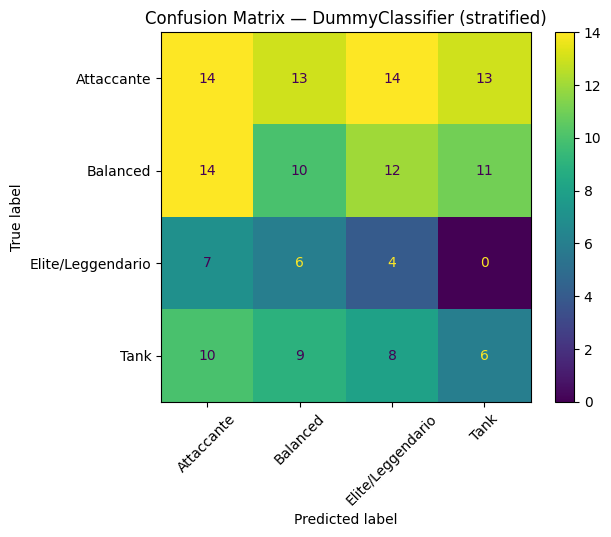

In [6]:
# Fit del modello Dummy
# Se utilizziamo il training set bilanciato stratified = uniform (solo in questo caso)
dummy = DummyClassifier(strategy="stratified")
dummy.fit(x_train, y_train)

# Predizione sul test ignorando completamente le feature di input del training set
y_pred = dummy.predict(x_test)

#calcolo delle metriche
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
rec  = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1   = f1_score(y_test, y_pred, average="macro", zero_division=0)

print("== Metriche su TEST ==")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f} (macro)")
print(f"Recall   : {rec:.4f} (macro)")
print(f"F1-score : {f1:.4f} (macro)")

labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix — DummyClassifier (stratified)")
plt.show()

Il DummyClassifier con strategia stratified è stato utilizzato come baseline di riferimento. Esso genera predizioni casuali che rispettano la distribuzione delle classi nel training set bilanciato. Le metriche ottenute sul test set — accuracy 0.22, F1-macro 0.21 — confermano che il modello non possiede alcuna capacità predittiva reale, costituendo così una baseline affidabile per confrontare le performance dei modelli supervisionati.